In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from scipy.stats import lognorm

In [4]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 0.6

# Options and Black-Scholes formula
## Part 1

In this article series, I will derive the Black-Scholes equation for valuing a European call option in the classical way.

**DISCLAIMER:** in these articles, I try to give an intuition of what is happening in general, so in many places I deliberately omit mathematical formalities so as not to complicate understanding.


In the previous article, we discussed what options are and how they work. Now let's derive a formula for estimating the value of a European call option.

Do not be intimidated by all the terms in the course of the article, I will try to explain each term clearly.

## What's in this article: 
1. Naive representation of price movement in the market
2. Adding randomness - price movement as a stochastic process
3. Normal and log-normal distribution
4. Equation of price movement when it is distributed log-normally
5. Difficulties of the derived equation
6. Girsanov's theorem and the risk-neutral measure
7. Getting rid of the unknown drift parameter. What's next?

## Naive representation of price movement in the market

Suppose we have some risky asset that is traded on the stock exchange. For example, the cost of ether depending on the time.

We are looking for a function that would return relative price of the underlying asses (in fact, **our** $S(t)$ **is actually** $\frac{S(t)}{S_0}$) 

We want to make some predictions about the future underlying price. In other words, we want to have a function $S(t)$ such that it would return the asset price at any timestamp in the future. We can write it in the following way:

$$dS(t) = \mu(t) dt$$

Integrating it, we get

$$S(T) = S_0 + \int_0^T{\mu(t) dt}$$

**Such approach has a serious issue**

Obviously, we see only the historical price movements and nobody knows the price movement in the future. The asset price may rise, drop - everything's possible. But with the approach above, we are looking for a deterministic function that would return asset price **deterministically**

Due to lots of different reasons, it's impossible to find that deterministic function.

### Adding randomness - price movement as a stochastic process

Since we can't find that deterministic function, let's consider a process that has two different parts: deterministic and stochastic part.

$$dX(t) = \mu(t) dt + \sigma dW$$

$X(t)$  - value of considered stochastic process at the moment $t$ <br>
$\mu(t)$ - a 'drift' parameter <br>
$\sigma$ - a 'volatility' parameter <br>
$dW$ - parameter responsible for stochastic part (Wiener process)

The process $W_t$ is called a Wiener process, if the following properties are satisfied:

- $W(0) = 0$ almost surely (i.e with probability $1$)
- $W_t$ has independent increments
- $W_t - W_s \sim N(0, (t-s)),\:\: 0 \leq s \leq t \lt \infty $ - meaning that any difference is normally distributed

Thus, $dW \sim N(0,  dt)$

### Normal and log-normal distibution

If we consider a processs described above, at any time value $X(t)$ is normally distributed.


It has been empirically established that the asset price is more likely lognormally distributed than normally distributed.

This can be explained by the fact that the markets periodically experience sharp collapses or some unlikely events that usually no one takes into account (lognormal distribution has a 'long tail').

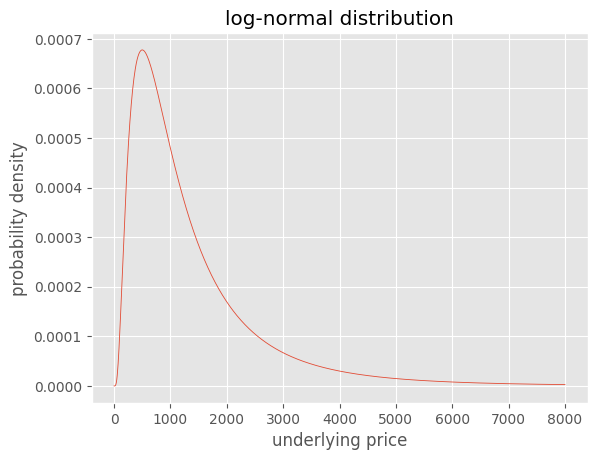

In [6]:
mean = 1000
stdev = 1000
phi = (stdev ** 2 + mean ** 2) ** 0.5
mu = np.log(mean ** 2 / phi)
sigma = (np.log(phi ** 2 / mean ** 2)) ** 0.5
data=np.random.lognormal(mu, sigma , 1000)

x = np.linspace(0, mean*8, 1000)
p = lognorm.pdf(x = x, scale = mean, s = sigma)
plt.plot(x, p)
plt.title('log-normal distribution')
plt.xlabel('underlying price')
plt.ylabel('probability density')
plt.show()

### Lognormal distribution in the real world
#### (nothing more than a joke)

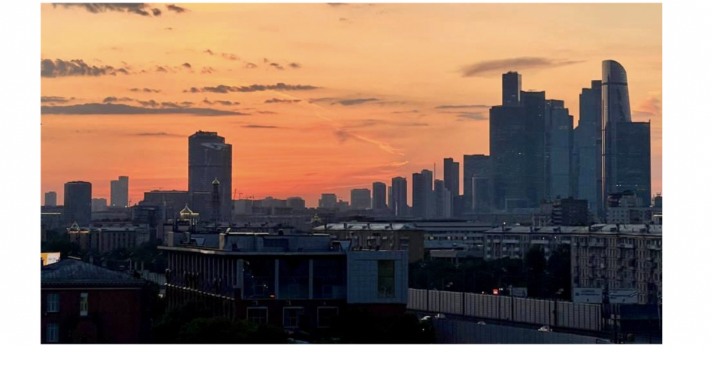

#### The equation for price movement when it is log-normally distributed:

The process $X_t$ that is **normally** distributed: $dX(t) = \mu(t) dt + \sigma dW$

Taking a logarithm of the process $X(t)$, we get the equation of the price that is **lognormally** distributed:

$$ln(S_t) = X_t$$

$S_t$ - ether price at the time $t$

$$d(X_t) = d(ln(S_t)) = \mu(t) dt + \sigma dW$$

Remembering that

$d(ln(S)) = \frac{1}{S} dS$

we get

$$\frac{dS}{S} = \mu(t) dt + \sigma dW $$

Finally we get:

$$dS = \mu(t) S dt + \sigma S dW $$

This equation is called a **geometric Brownian motion**.

We want to solve this equation, i.e. derive a function $S(T) = \: ...$ (it will be indeterministic due to stochastic part)

#### Obstacles of the current equation

1. We have no idea about the drift parameter $\mu(t)$. Intuitively, this is the "risk" parameter for a specific stock, coin, or token (but formally, the risk parameter is defined in another way, in the future there will be a formula). And this parameter can be time-dependent.
2. The current equation is quite difficult to solve. We can't just integrate that because right part has non-constant coefficients  $\mu(t)S$ and $\sigma S$.


#### Let's solve problems one by one

Let's step aside a little and remember how the value of a risk-free asset is generally determined.

A **risk-free asset** is, for example, bonds. That is, such instruments that are guaranteed to bring income in the future with a rate of $r$, called the risk-free interest rate. For example, such instruments are used to protect themselves from inflation.

For simplicity, we assume that the risk-free interest rate is constant.

Then the differential equation for the cost of a risk-free asset is given by the equation

$$dB = r B dt$$

Bond equations doesn't have a stochastic part, and drift $r$ is usually known to anyone (for example, $r=0.1$ means that annual risk-free rate equals to 10%)

Equation a risky asset is given by: $dS = \mu(t) S dt + \sigma S dW$.

Let's suppose that our $\mu$ parameter is not an arbitrary function, but a risk-free rate. In other words, if our equation would be defined as follows:

$$dS = r S dt + \sigma S dW$$

then the equation would have 1 less unknown parameter, and we could move to problem 2.

**In short, it would be cool to get rid of the unknown drift. But is there any way to do it?**

It turns out yes!

**Girsanov's theorem** allows to do it.

Recalling the mathematical analysis (and omit some conditions of the theorems), there is a theorem that allows to switch between measures (Radon-Nikodym theorem), and the 'transition coefficient' between measures is called the Radon-Nikodym derivative and is defined as follows:

$$\frac{d\nu}{d\lambda} = f(x)$$

$\nu$, $\lambda$ - Lebesgue measures

In our case, the Radon-Nikodym derivative is not a 'real' function, but a stochastic process.

#### Girsanov's Theorem and risk-neutral measure

Given the equation

$$dS = \mu(t) S dt + \sigma S dW, \: \: S_0 > 0,$$

we want to get

$$dS = r S dt + \sigma S dW$$

At first glance, it seems that this is impossible. In fact, it turns out that we just need to switch to another probability measure - "risk-neutral".

##### Firstly, I am going to remind what's a martingale

**Martingale** - is a stochastic process for which, at a particular time, the conditional expectation of the next value in the sequence is equal to the present value, regardless of all prior values.

**According to Girsanov's theorem**, we need to find such process $\{Z_t\}_{t\in[0, T]}$ which is a martingale, and then it could be the Radon-Nikodym derivative for switching between another measure.

We have the equation in the measure $P$:

$$dS = \mu(t) S dt + \sigma S dW, \: \: S_0 > 0$$

But $S_t$ is not a martingale in the measure $P$, because there's a drift $\mu(t) S_t \neq 0$

Recalling that equation for the bond is given by:

$$dB_t = r B_t dt$$

#### Our objective:
Find a Radon-Nikodym derivative such that the new measure $Q$ does not contain the parameter $\mu$ at all.

**Let's take a look at this process:** 

$\{\frac{S_t}{B_t}\}$ - that is, the asset price divided by bond price (at the time t)


Let's write a differential equation for that process. Using Ito's lemma for that process, we get:

$$d(\frac{S_t}{B_t}) = S_t d(\frac{1}{B_t}) + \frac{1}{B_t}dS_t + \frac{1}{2}dS_td(\frac{1}{B_t})$$

Substituting the equations for $dS_t$ and $dB_t$:

$$d(\frac{S_t}{B_t}) = -r\frac{S_t}{B_t}dt + (\frac{1}{B_t} - \frac{1}{2}r\frac{1}{B_t}dt)(\mu S_t dt + \sigma S_t dW_t)$$

Simplifying this expression and canceling the terms above $dt$, we obtain the final formula for the process $\{\frac{S_t}{B_t}\}$:

$$d(\frac{S_t}{B_t}) = \sigma \frac{S_t}{B_t}(\frac{\mu - r}{\sigma}dt + dW_t)$$

#### And now the most important thing

If we make a substitution for:

$$\tilde{dW_t} = \frac{\mu - r}{\sigma}dt + dW_t$$

then process 

$$d(\frac{S_t}{B_t}) = \sigma \frac{S_t}{B_t}\tilde{dW_t}$$

is a martingale

Let's now see how the process $S_t$ will look like under such a change of measure.

Now let's express $dW_t$ in terms of $\tilde{dW_t}$ and substitute it into the equation for $dS_t$:

$$dS_t = \mu S_t dt + \sigma S_t dW $$

$$dS_t = \mu S dt + \sigma S (\tilde{dW_t} - \frac{\mu - r}{\sigma}dt)$$

$$dS_t = \mu(t) S dt + \sigma S (\tilde{dW_t} - \frac{\mu - r}{\sigma}dt)$$

Finally, we get

$$dS_t = r S dt + \sigma S \tilde{dW_t}$$

$\tilde{dW_t}$ - a Wiener process under the measure $Q$

**Thus, we have moved to such a probability measure, where the unknown parameter $\mu$ becomes equal to the interest rate $r$. Moreover, if we consider the discounted (by risk-free rate) price $S_T$ under such a measure, then such a process will be a martingale.** That's why such a measure is also called **martingale measure**.

P.S. it's essential that the price must be discounted.

#### Now we can move to Problem 2.

Now that there is no unknown function $\mu$, we can solve the resulting equation.

$$dS_t = r S dt + \sigma S \tilde{dW_t}$$

This process is called geometric Brownian motion with the constant drift.

How to solve this equation and finally derive the Black-Scholes equation, I will show in the next articles

#### Thanks for your time.

Hope you enjoyed the article.

##### My twitter:
https://twitter.com/kirrya95

##### My telegram:
https://t.me/kirr_ya